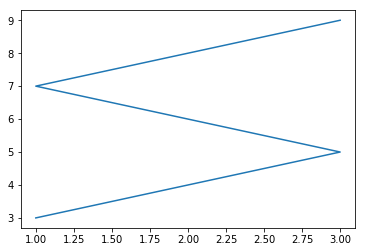

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# from jupyterthemes import jtplot

# jtplot.style(theme='gruvboxd')
x = np.array([1, 2, 3, 1, 2, 3])
y = np.array([3, 4, 5, 7, 8, 9])

# plt.plot(x, y)

# ax = plt.subplot(); ax.plot(x, y)
# ax = plt.subplot(111); ax.plot(x, y)

fig, ax = plt.subplots(); ax.plot(x, y)
# fig, ax = plt.subplots(1, 1); ax.plot(x, y)

""" first is error! """
# fig = plt.figure(); ax = fig.add_subplot(); ax.plot(x, y)
# fig = plt.figure(); ax = fig.add_subplot(111); ax.plot(y)

plt.show()

/usr/local/lib/python3.5/dist-packages/matplotlib/pyplot.py:3363: RuntimeWarning: Second argument 'r' is ambiguous: could be a color spec but is in data; using as data.  Either rename the entry in data or use three arguments to plot.
  ret = ax.plot(*args, **kwargs)


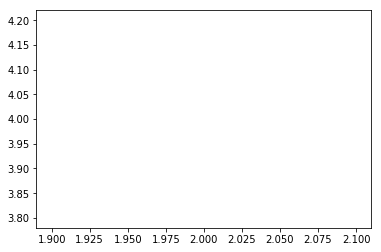

In [2]:
%matplotlib inline
plt.plot('v', 'r', data={'v':  2, 'r':4})
plt.show()

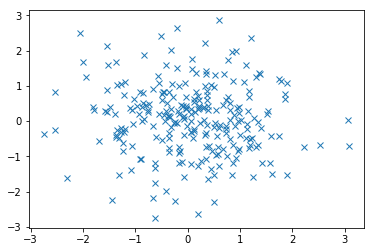

In [101]:
%matplotlib inline
coords = np.random.randn(250, 3).view(dtype=[('a', float), ('b', float), ('c', float)])

plt.plot(coords['a'], coords['b'],'x')
# plt.plot('a', 'b', data=coords)
plt.show()

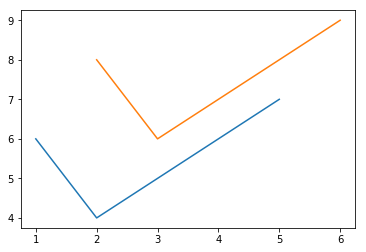

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([1, 2, 5])
y = np.array([6, 4, 7])

plt.plot(x, y, x+1, y+2)

[[6 4 7]
 [8 6 9]]


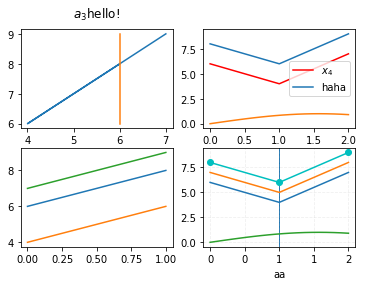

In [5]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

y = np.array([6, 4, 7])
print((np.vstack((y,y+2))))
x = np.linspace(0,2,20)

fig, ax = plt.subplots(2,2)
ax[0, 0].plot(y, y+2,)
ax[0, 0].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax[0, 0].plot([6,6], [6,9])
ax[0, 0].set_title(r'$a_3$hello!',y=1.05)

ax[0, 1].plot(y, 'r', y+2)
ax[0, 1].legend([r'$x_{%(a)s}$' % {'a': 4}, 'haha'])
ax[0, 1].plot(x, np.sin(x))

ax[1, 0].plot(np.vstack((y,y+2)))

ax[1, 1].plot(y, '')
ax[1, 1].plot(y+1, '')
ax[1, 1].plot(y+2, 'c', marker='o')
ax[1, 1].axvspan(0.99, 1.01)
ax[1, 1].plot(x, np.sin(x))
ax[1, 1].xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax[1, 1].set_xlabel('aa', labelpad=5)
# print(mpl.rcParams['colormap'])
print(plt.get_cmap())
plt.grid(linestyle='--', alpha=0.2)

### Legend

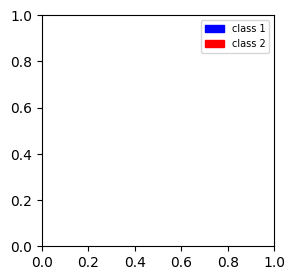

In [248]:
""" custom legend """
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

c = cycler(color=['b', 'r'])
plt.rc('axes', prop_cycle=c)
fig, ax = plt.subplots(figsize=(3,3))
c1, c2 = [_['color'] for _ in list(c.__iter__())]
ax.legend(handles=[
    Patch(color=c1, label='class 1'),
    Patch(color=c2, label='class 2')
], fontsize=7)

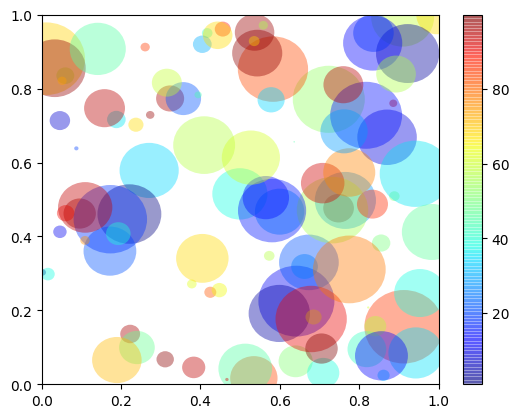

In [216]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
from matplotlib.patches import Circle
import numpy as np

# (modified from one of the matplotlib gallery examples)
resolution = 50 # the number of vertices
N = 100
x       = np.random.random(N)
y       = np.random.random(N)
radii   = 0.1*np.random.random(N)
patches = []
for x1,y1,r in zip(x, y, radii):
    circle = Circle((x1,y1), r)
    patches.append(circle)

fig = plt.figure()
ax = fig.add_subplot(111)

colors = 100*np.random.random(N)
p = PatchCollection(patches, cmap=matplotlib.cm.jet, alpha=0.4)
p.set_array(colors)
ax.add_collection(p)
plt.colorbar(p)

plt.show()

<IPython.core.display.Javascript object>


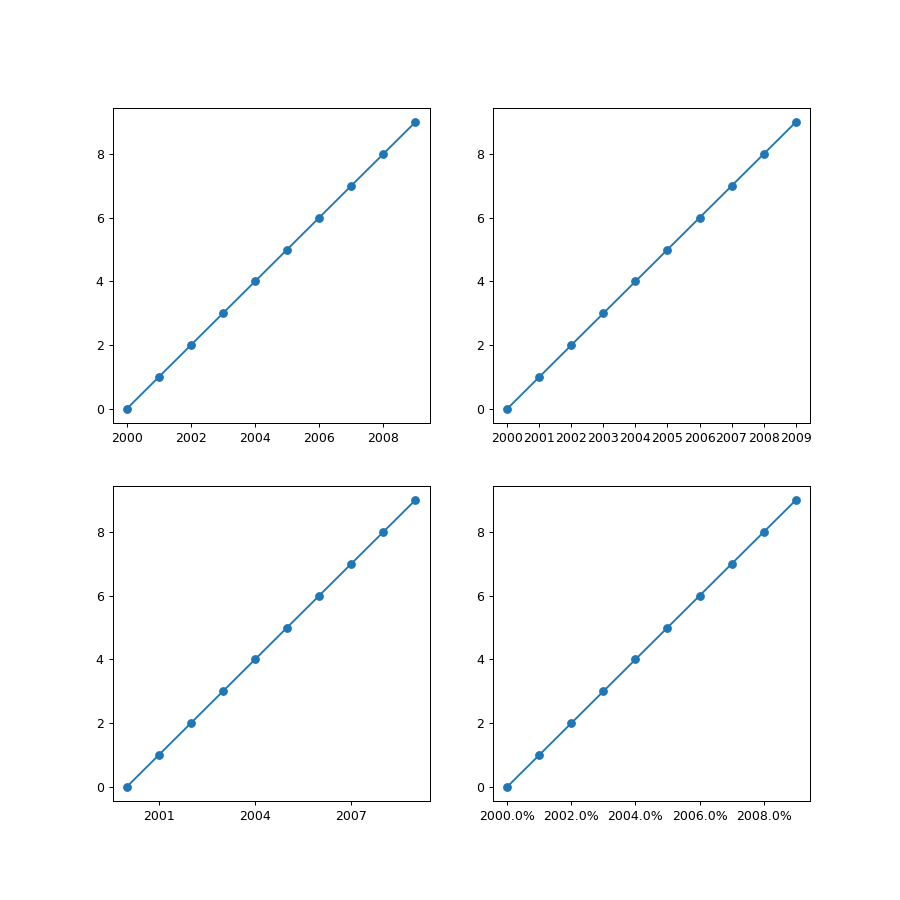

In [88]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import feature_visualization as fv
fv.reset()

fig, axes = plt.subplots(2,2,figsize=(10,10))
for ax in axes.flatten(): 
    ax.plot(np.arange(2000, 2010), range(10), marker='o')
axes[0,1].xaxis.set_major_locator(ticker.MultipleLocator())
axes[1,0].xaxis.set_major_locator(ticker.MultipleLocator(3))
axes[1,1].xaxis.set_major_formatter(ticker.PercentFormatter())

plt.show()

### Axis Scaling

1 (-0.16500000000000001, 1.2649999999999999)
2 (-1.1100000000000001, 1.3100000000000001)
3 (-1.1100000000000001, 1.3100000000000001)
4 (-2.1600000000000001, 1.3599999999999999)


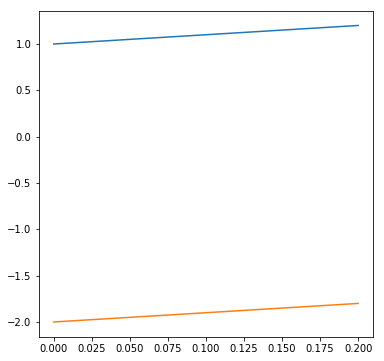

In [86]:
import matplotlib.pyplot as plt

"""
every time the data updates:
`set_data` -> `relim` & `autoscale_view` / `set_ylim` / `update_datalim`
"""
def test_plot(ax):
    l1, = ax.plot([0,0.1,0.2],[1,1.1,1.2])
    l2, = ax.plot([0,0.1,0.2],[-0.1,0,0.1])
    return l1, l2

fig, ax = plt.subplots(1,1,figsize=(6,6))
_, l2 = test_plot(ax)
l2.set_data([0,0.1,0.2],[-1,-0.9,-0.8])
ax.relim()
print('1', ax.get_ylim())
""" the two methods seem equal. """
# ax.autoscale_view(True,True,True)
ax.autoscale()
print('2', ax.get_ylim())

l2.set_data([0,0.1,0.2],[-2,-1.9,-1.8])
ax.relim()
print('3', ax.get_ylim())
ax.autoscale_view(True,True,True)
print('4', ax.get_ylim())
# print(ax.axis())

# plt.draw()
plt.show() #does not show auto scaled

140207526340488
140207526340488
140207526340488
True
False
False
<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f849bd95908>>
<bound method Axes.plot of <matplotlib.axes._subplots.AxesSubplot object at 0x7f849bcee0f0>>


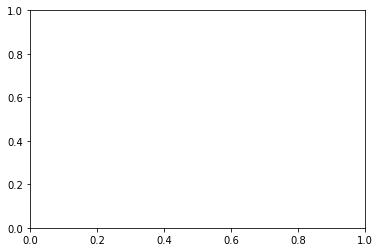

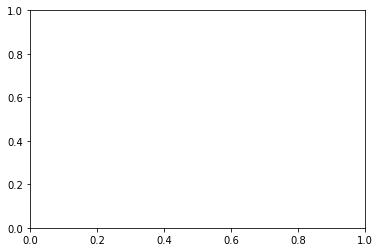

In [85]:
import matplotlib.pyplot as plt
import feature_visualization as fv

fig, ax = plt.subplots()
fig2, ax2 = plt.subplots()
print(id(ax.plot))
print(id(ax2.plot))
print(id(getattr(ax,'plot')))
print(id(ax.plot)==id(ax2.plot))
print(ax.plot==ax2.plot)
print(ax.plot is ax2.plot)
print(ax.plot)
print(ax2.plot)

[[0 0 0 0 0]
 [1 1 1 1 1]
 [2 2 2 2 2]
 [3 3 3 3 3]
 [4 4 4 4 4]]
[[0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]
 [0 1 2 3 4]]
[[ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]
 [ 1.  1.  1.  1.]]


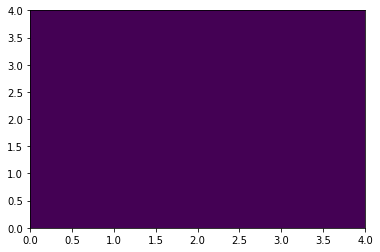

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# D = np.random.uniform(0, 100, size=(5, 5))
D = np.ones((5,5))
fig, ax = plt.subplots()
h, w = D.shape
x, y = np.mgrid[:5,:5]
print(x)
print(y)
img = ax.pcolormesh(x, y , D)

D2 = img.get_array().reshape(img._meshWidth, img._meshHeight)
# D2 = img.get_array()
# assert  np.array_equal(D, D2)
print(D2)

### Axis Scaling in 3d

(-0.99998941272346409, 0.99994651678960456) | (-1.9999894127234641, -5.3483210395444125e-05)
(-1.9999894127234641, 0.99994651678960456)


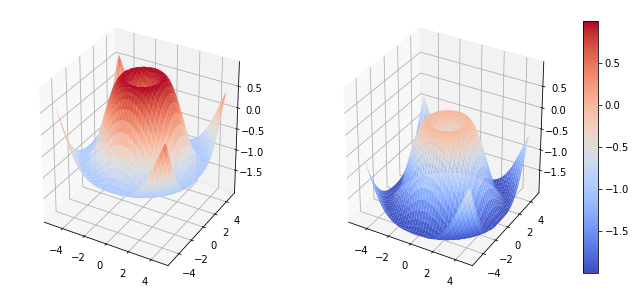

Axes3DSubplot(0.125,0.125;0.352273x0.755)
Axes3DSubplot(0.547727,0.125;0.352273x0.755)


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import Normalize

X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
clim = np.min(Z)-1, np.max(Z)

fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1, 2, 1,projection='3d')
surf1 = ax1.plot_surface(X, Y, Z, cmap='coolwarm')
# print(surf1.get_array())

ax2 = fig.add_subplot(1, 2, 2,projection='3d')
surf2 = ax2.plot_surface(X, Y, Z-1, cmap='coolwarm')

ax1._shared_z_axes.join(ax1, ax2)
print(ax1.get_zlim(), '|', ax2.get_zlim())
_ = (*ax1.get_zlim(), *ax2.get_zlim())
new_zlim = min(_), max(_)
print(clim)
""" same """
# print(ax1.get_zlim3d())

""" ax1.relim() & ax[1|2].autoscale() not work. """
ax1.set_zlim(new_zlim)
ax2.set_zlim(new_zlim)
# print(ax1.zz_viewLim)
# print(ax1.get_w_lims())
# print(ax1.get_zlim(), '|', ax2.get_zlim())

surf1.set_clim(new_zlim)
surf2.set_clim(new_zlim)
m = cm.ScalarMappable(cmap='coolwarm', norm=Normalize(*new_zlim))
m.set_array([])
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
plt.colorbar(m, cax=cbar_ax)
plt.show()
print(surf1._axes)
print(surf2._axes)

"""
Situations in 3d:
 - `relim()` is not useful.
 - `autoscale()` will change limit based its own axis's data, regradless of \
   previous limits.
"""
pass

<IPython.core.display.Javascript object>


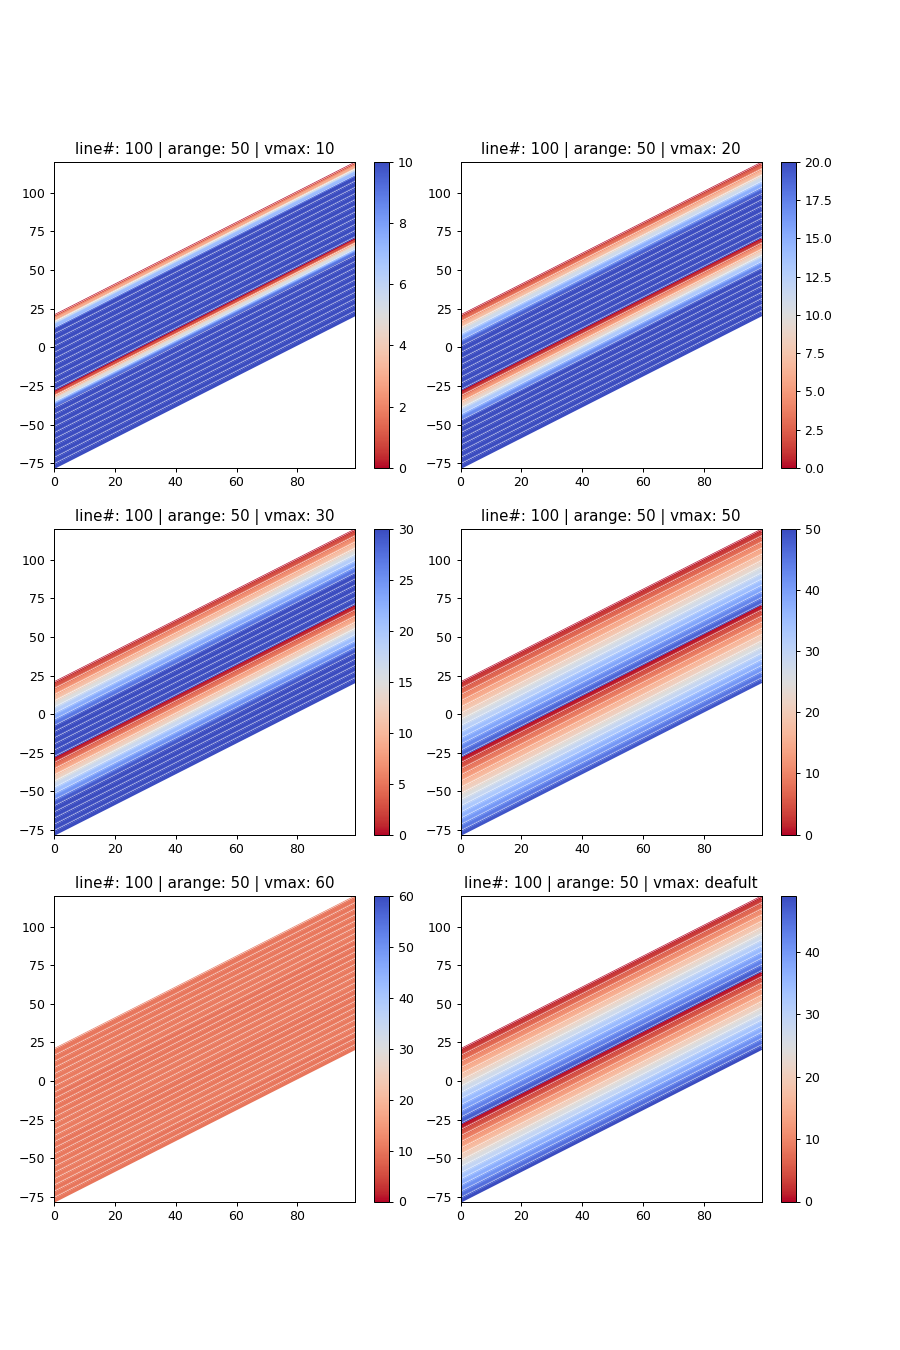

In [26]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.collections import LineCollection
from matplotlib import colors as mcolors
import numpy as np

import feature_visualization as fv
fv.reset()

# mpl.interactive()
N = 100
x = np.arange(N)
ys = [x - i+1+20  for i in x]
# print(ys)

fig, axes = plt.subplots(3,2, figsize=(10,15))
axes = np.array(axes).flatten()
fig.subplots_adjust(left=0.06, right=0.93, wspace=0.08)

def do_plot(ax, title):
    ax.set_xlim(np.min(x), np.max(x))
    ax.set_ylim(np.min(ys), np.max(ys))
#     global colors
#     colors = [mcolors.to_rgba(c)
#               for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
    # colors = [c
    #           for c in plt.rcParams['axes.prop_cycle'].by_key()['color']]
#     print(colors[0])

    # Make a sequence of x,y pairs
    ax.add_collection(line_segments)
    
    # axcb.set_label('Line Number')
    ax.set_title(title)
    # plt.sci(line_segments)  # This allows interactive changing of the colormap.
    plt.show()
    
    
def get_lc(): return LineCollection([
    np.column_stack([x, y]) for y in ys], linewidths=(0.5, 1, 1.5, 2), \
    linestyles='solid', cmap='coolwarm_r', #colors=colors
)

vmax = 'default'
arange = 50
""" set array -> map it to color (`colorbar`) -> set limit. """
line_segments = get_lc()
line_segments.set_array(np.arange(arange))
line_segments.set_clim(0, 10)
axcb = fig.colorbar(line_segments, ax=axes[0])
do_plot(axes[0], r'line#: %d | arange: %d | vmax: %s' % (N, arange, 10))

line_segments = get_lc()
line_segments.set_array(np.arange(arange))
axcb = fig.colorbar(line_segments, ax=axes[1])
vmax = 20
line_segments.set_clim(0, vmax)
do_plot(axes[1], r'line#: %d | arange: %d | vmax: %s' % (N, arange, vmax))

line_segments = get_lc()
# line_segments.set_array(np.linspace(0, 1, 50))
line_segments.set_array(np.arange(arange))
axcb = fig.colorbar(line_segments, ax=axes[2])
vmax = 30
line_segments.set_clim(0, vmax)
do_plot(axes[2], r'line#: %d | arange: %d | vmax: %s' % (N, arange, vmax))

line_segments = get_lc()
# line_segments.set_array(np.linspace(0, 1, 50))
line_segments.set_array(np.arange(arange))
axcb = fig.colorbar(line_segments, ax=axes[3])
vmax = 50
line_segments.set_clim(0, vmax)
do_plot(axes[3], r'line#: %d | arange: %d | vmax: %s' % (N, arange, vmax))

line_segments = get_lc()
line_segments.set_array(np.linspace(10,11,30))
vmax = 60
line_segments.set_clim(0, vmax)
axcb = fig.colorbar(line_segments, ax=axes[4])
do_plot(axes[4], r'line#: %d | arange: %d | vmax: %s' % (N, arange, vmax))

line_segments = get_lc()
# line_segments.set_array([np.random.random(10)*15])
line_segments.set_array(np.arange(arange))
vmax = 'deafult'
# line_segments.set_clim(0, vmax)
axcb = fig.colorbar(line_segments, ax=axes[5])
do_plot(axes[5], r'line#: %d | arange: %d | vmax: %s' % (N, arange, vmax))

### Color Mapping of Artist
##### Method 1
1.determine a value sequence and its domain in approaches of the following:
- `set_array` \[and `clim` (if clipping needed) \]
- `set_array` and `norm` of `plot_surface|imshow|ScalarMappable...`
- data and `clim` (ditto)
- data and `norm` (ditto) 

2.determine the mapping $f: value\ domain \rightarrow cmap$

3.define a color-cycler based 2, and color the artists.
  
  
##### Method 2
use a custom color-cycler: `cycler(color=...)`
- `color=['b', 'r']`...
- `color=plt.cm.coolwarm([0,1])`...

In [316]:
greys = plt.cm.Greys
print(greys)
print(greys[0])
print(greys(1))
print('--------')
print(greys([10]))
print(greys([0,1]))
print(greys([0,0.3,0.5,1]))
print('--------')
print(greys([-1,1]))

TypeError: 'LinearSegmentedColormap' object does not support indexing

In [275]:
from cycler import cycler
# c = cycler(color=['b', 'r'])
c = cycler(color=plt.cm.coolwarm([0,1]))
# print(c)
plt.cm.coolwarm([0,1])
# dir(c)
# c1 = list(c.__iter__())
# print(c1)

array([[ 0.2298057 ,  0.29871797,  0.75368315,  1.        ],
       [ 0.23437708,  0.30554173,  0.75967953,  1.        ]])

TypeError: unorderable types: reversed() > int()

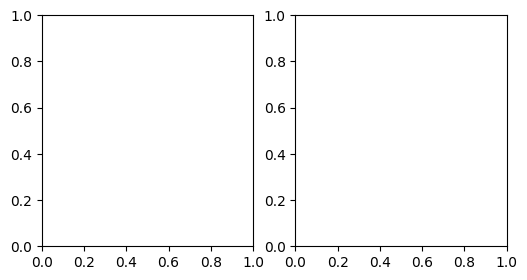

In [313]:
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from cycler import cycler
import numpy as np

# plt.rc('axes', prop_cycle=cycler(color=['b', 'r']))
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 3))
# ax1.set_prop_cycle(cycler(color=['b', 'r']))
# ax2.set_prop_cycle(cycler(color=['b', 'r']))


xy = np.array((0.3, 0.2))
coordsA = "data"
coordsB = "data"
con = lambda xy, c: ConnectionPatch(
    xyA=xy, xyB=xy, coordsA=coordsA, coordsB=coordsB,
    axesA=ax2, axesB=ax1, arrowstyle="->", shrinkB=5, color=c)
num = 20

for i, c in zip(np.linspace(0, 0.6, num), 
              plt.cm.coolwarm(reversed(np.random.random(num)), alpha=0.6)):
    ax2.add_artist(con(xy+i, c=c))

plt.show()

### Histogram

[-9.24246338  5.4570671  -5.3004132   6.24601157 -6.14668837 -5.59487749
  8.78462765 -5.5945806  -2.41743066  8.76707589] 10 -9.24246337996 8.78462765058
bin_edges [1 1 3 1 0 0 0 0 2 2] [-9.24246338 -7.43975428 -5.63704517 -3.83433607 -2.03162697 -0.22891786
  1.57379124  3.37650034  5.17920944  6.98191855  8.78462765]
[-9.2424633799631764, -6.1466883699806862, -5.5948774888164499, -5.5945806032755545, -5.3004131956757483, -2.4174306591952521, 5.4570670956675809, 6.2460115708187347, 8.7670758939771147, 8.7846276505849978]


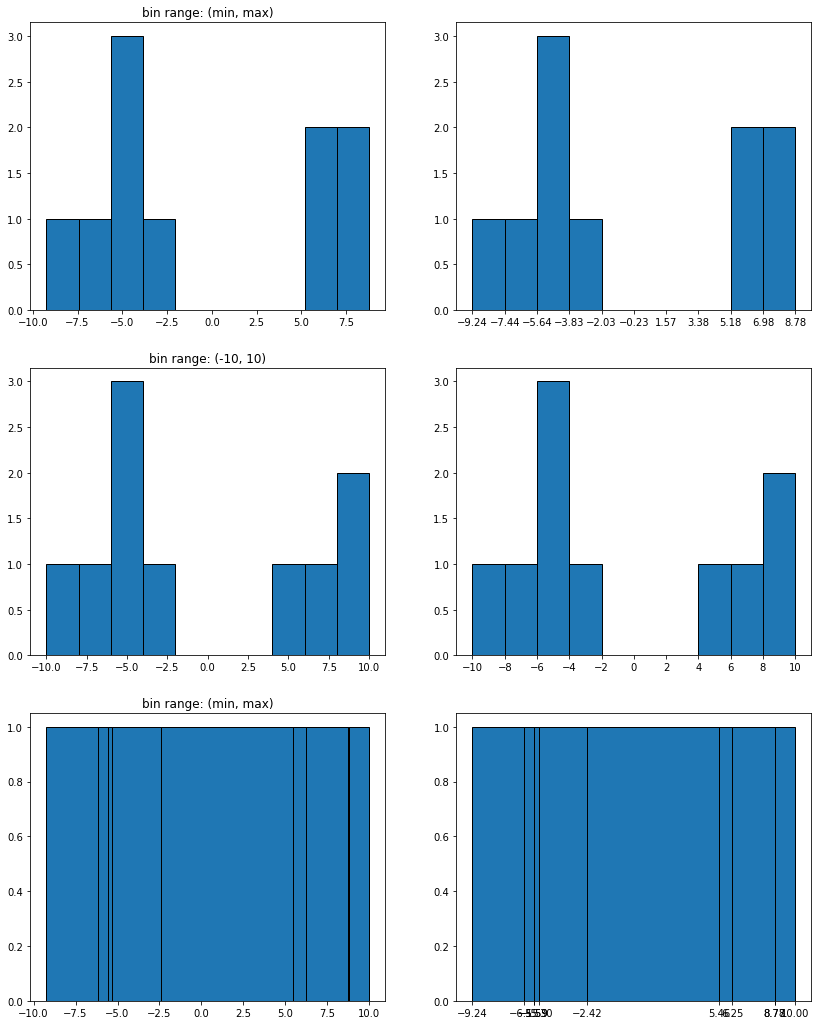

[ 0.   0.2  0.4  0.6  0.8  1.   1.2]


In [252]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3,2,figsize=(14,18))
a = [5.1] + [3.2,7.1]*3 + [1.1,9.2]*6
a = [5] + [3,7]*3 + [1,9]*6
a = 10*(2*np.random.sample(10)-1)
print(a, len(a), min(a), max(a))
bins = 10 # = edge_num - 1 of `linspace`
""" bin_edges = np.linspace(min, max, bins+1) """
print('bin_edges', *np.histogram(a, bins))
print(sorted(a))

# _ = ax.hist(a, bins, align='left', rwidth=0.1, alpha=0.5, ec='k')
axes[0, 0].hist(a, bins, ec='k')
axes[0, 0].set_title('bin range: (min, max)')
_ = axes[0, 1].hist(a, bins, ec='k')
axes[0, 1].set_xticks(_[1])
axes[1, 0].hist(a, np.linspace(-10, 10, bins+1), ec='k')
axes[1, 0].set_title('bin range: (-10, 10)')
_ = axes[1, 1].hist(a, np.linspace(-10, 10, bins+1), ec='k')
axes[1, 1].set_xticks(_[1])
axes[2, 0].hist(a, sorted(a)+[10], ec='k')
axes[2, 0].set_title('bin range: (min, max)')
_ = axes[2, 1].hist(a, sorted(a)+[10], ec='k')
axes[2, 1].set_xticks(_[1])

plt.show()
print(axes[2,1].get_yticks())

<IPython.core.display.Javascript object>


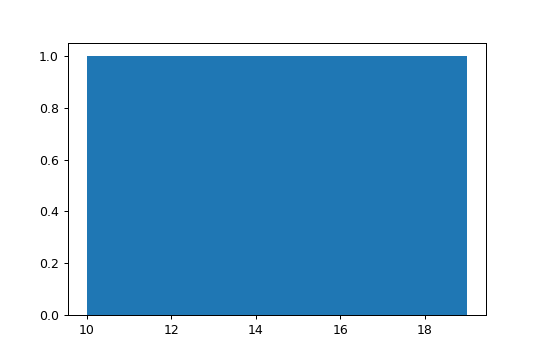

AttributeError: 'tuple' object has no attribute 'set_data'

In [108]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
hist = ax.hist(range(10,20))
hist.set_data(range(20,30))
plt.show()

`ax.get_[x|y]ticklabels.xxx`
`ax.[x|y]axis.set_tick_params` | `ax.tick_params`
`ax.set_[x|y]ticks`

<IPython.core.display.Javascript object>


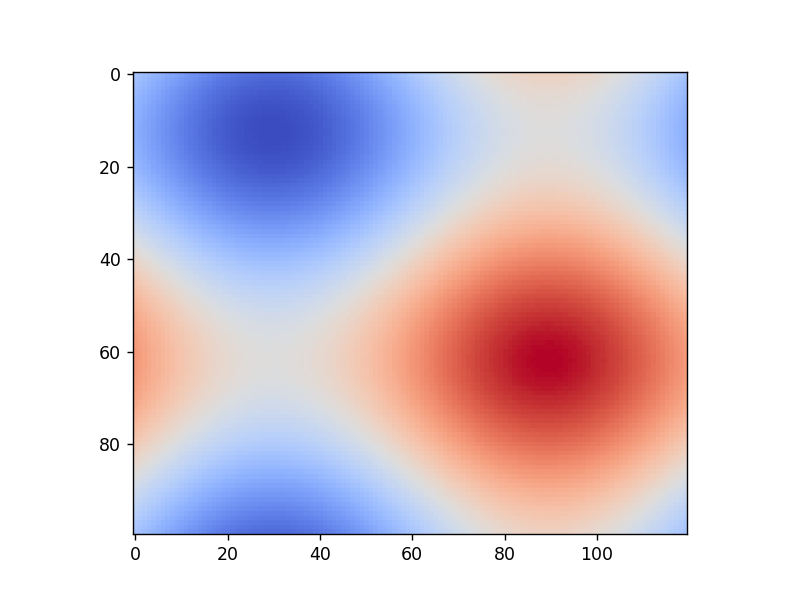

'\nRemember the differences:\n1. `animated` arg\n2. return artists\n'

In [2]:
"""
=================
An animated image
=================

This example demonstrates how to animate an image.
"""
import numpy as np
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

fig = plt.figure()


def f(x, y):
    return np.sin(x) + np.cos(y)

x = np.linspace(0, 2 * np.pi, 120)
y = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1)
im = plt.imshow(f(x, y), animated=True, cmap='coolwarm')

def updatefig(value):
    global x, y
#     x += np.pi / (15.*value)
#     y += np.pi / (20.*value)
    x += value * np.pi / (15.)
    y += value * np.pi / (20.)
    im.set_data(f(x, y))
    plt.show()
    # return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
# ax_ = fig.add_axes([0.12, 0.95, 0.7, 0.02])
# s = Slider(ax_, 'test', 1, 1000)
# s.on_changed(updatefig)

"""
Remember the differences:
1. `animated` arg
2. return artists
"""


In [6]:
import IPython
ip = IPython.get_ipython()
print(ip)

<IPython.core.display.Javascript object>


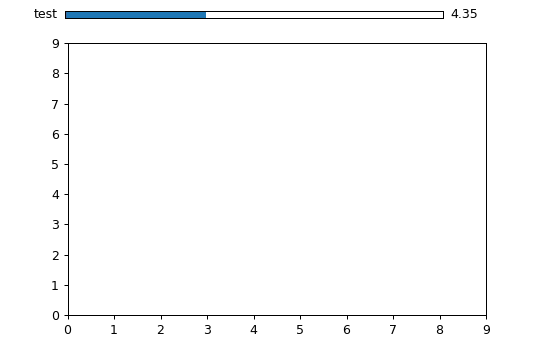

In [106]:
import numpy as np
%matplotlib notebook
%matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig = plt.figure()


xx, yy = np.meshgrid(range(10), range(10))
zz = np.random.sample((10, 10))
t = plt.pcolormesh(xx, yy, zz, animated=True)

def updatefig(value):
    t.remove()
    zz = np.random.sample((10, 10))
    t = plt.pcolormesh(xx, yy, zz, animated=True)
    
    return im,

ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True)
ax_ = fig.add_axes([0.12, 0.95, 0.7, 0.02])
s = Slider(ax_, 'test', 1, 10)
s.on_changed(updatefig)
plt.show()
"""
Remember the differences:
1. `on_changed` - manual updating: no `animated` arg!
2. return artists in `update` method.
"""
pass



<IPython.core.display.Javascript object>


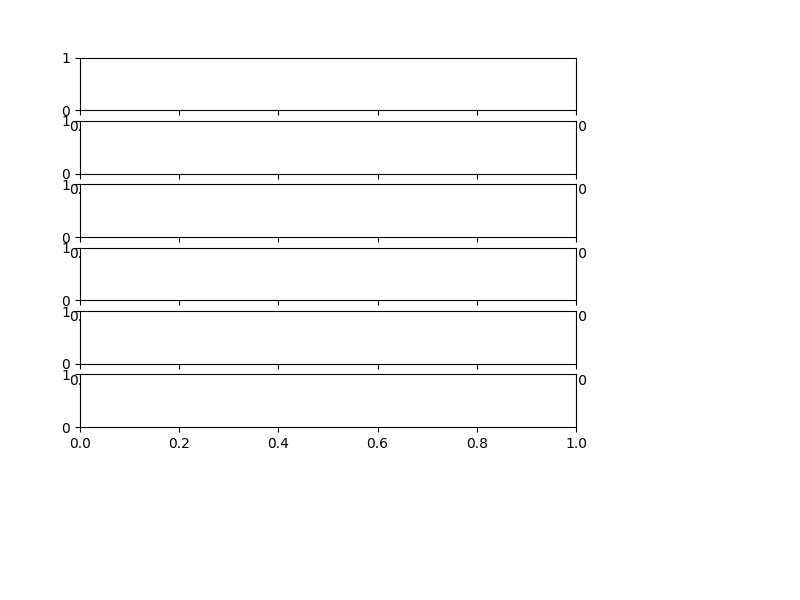

FPS: 184.07633075478378


In [28]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time

x = np.arange(0, 2*np.pi, 0.1)
y = np.sin(x)

fig, axes = plt.subplots(nrows=6)

fig.show()

# We need to draw the canvas before we start animating...
fig.canvas.draw()

styles = ['r-', 'g-', 'y-', 'm-', 'k-', 'c-']
def plot(ax, style):
    return ax.plot(x, y, style, animated=True)[0]
lines = [plot(ax, style) for ax, style in zip(axes, styles)]

# Let's capture the background of the figure
backgrounds = [fig.canvas.copy_from_bbox(ax.bbox) for ax in axes]

tstart = time.time()
for i in range(1, 2000):
    items = enumerate(zip(lines, axes, backgrounds), start=1)
    for j, (line, ax, background) in items:
        fig.canvas.restore_region(background)
        line.set_ydata(np.sin(j*x + i/10.0))
        ax.draw_artist(line)
        fig.canvas.blit(ax.bbox)
        plt.show()

print( 'FPS:' , 2000/(time.time()-tstart))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider

fig, ax = plt.subplots()

xx, yy = np.meshgrid(range(10), range(10))
zz = np.random.sample((10, 10))
t = ax.pcolormesh(xx, yy, zz)


def updatefig(value):
    global t
    t.remove()
    zz = np.random.sample((10, 10))
    t = ax.pcolormesh(xx, yy, zz)
    return t


ax_ = fig.add_axes([0.12, 0.95, 0.7, 0.02])
s = Slider(ax_, 'test', 1, 10)
s.on_changed(updatefig)
plt.show()
"""
Remember the differences:
1. `animated` arg
2. return artists
"""
pass

In [69]:
import ipywidgets as widgets

f = lambda x, *y: (x,y)
widgets.interact(f, x=(0,10), y=widgets.fixed((20,)))

interactive(children=(IntSlider(value=5, description='x', max=10), Output()), _dom_classes=('widget-interact',…

<function __main__.<lambda>>

### Bloody Lessons
1.when not in notebook, especially plus the case of `mpl.widgets`& `widgets.on_changed`, be very careful for the use of `plt.show`!!

2.DO NOT mix the `mpl.widgets` and `mpl.animation`!!

3.`mpl.animation`: `update` in `on_changed` must return artists!

In [30]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

# for k in mpl.RcParams:
#     if 'axes.' in k:
#         print(k, mpl.RcParams[k])
# print(mpl.RcParams
# print(plt.style.available)


# for style in plt.style.available:
#     print(style)
#     plt.style.use([style])
#     fig = plt.figure(figsize=(3,3))
#     plt.plot([2,3,5])


<IPython.core.display.Javascript object>


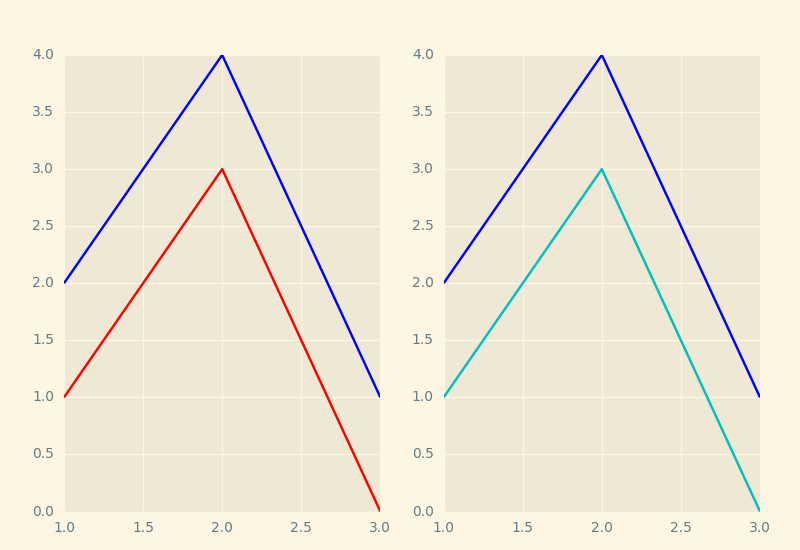

In [39]:
import matplotlib.pyplot as plt
from cycler import cycler

plt.rc('axes', prop_cycle=cycler(color=['b', 'r', 'c']))
fig, axes = plt.subplots(1,2)
x = [1,2,3]
y = np.array([2,4,1])
axes[0].plot(x, y)
axes[0].plot(x, y-1)
axes[1].plot(x, y)
axes[1].plot(x, y-1, 'c')
# axes[0].lines[0].set_data(x, y-1.5)
# axes[0].lines[1].set_data(x, y+1.5)

<IPython.core.display.Javascript object>


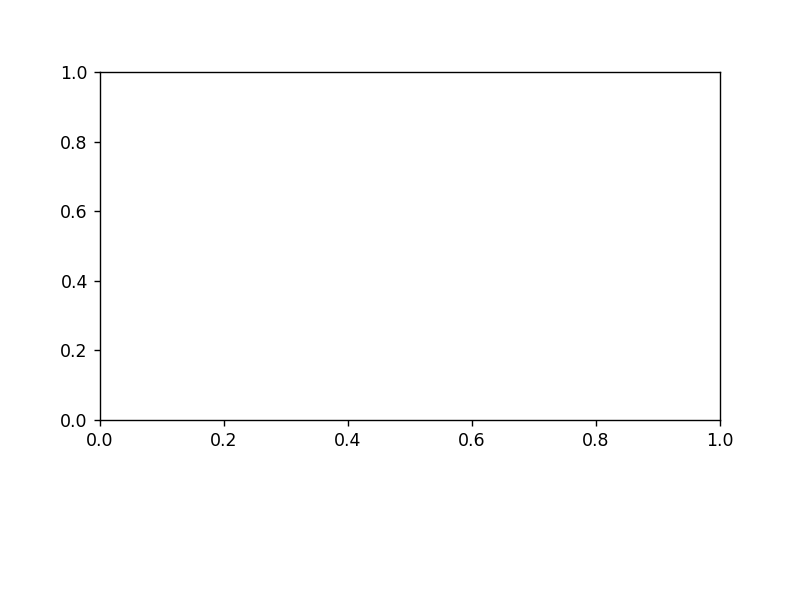

Text(0.5,0,'aa')

In [72]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
ax.set_xlabel('aa')

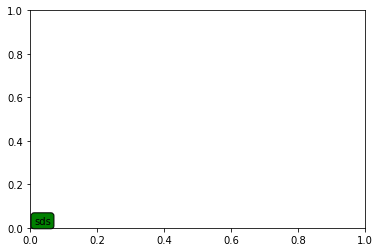

In [119]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
annot = ax.annotate(
                                "sds", xy=(0, 0), xytext=(4, 4),
                                textcoords="offset points",
                                bbox=dict(boxstyle="round", fc="g"),size=10
                            )
annot.set_visible(True)
plt.show()

### Imshow

TypeError: Image data cannot be converted to float

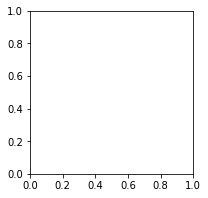

In [118]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(3,3))
# ax.imshow(np.random.random((2,2)))
ax.imshow(np.array([[1,object()]]))

In [136]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(3,3))
im = ax.imshow([[1,2]], cmap='RdBu_r', cmap='coolwarm')
im.set_data([np.array([2,1]),np.array([2,2])])
# im.set_data(np.atleast_2d(np.array((2,1))))

SyntaxError: keyword argument repeated (<ipython-input-136-24ed6f6f30be>, line 4)